# Imports

In [1]:
import matplotlib.pyplot as plt

from simulations_jit.SimulatedAnnealing import *
from simulations_jit.SimulatedAnnealingForces import *
from Analysis import *
import numpy as np

# Number of simulations

In [2]:
n_simulations = 20

# Getting best configurations for N=3, 5, 7, 9, 11, 12

In [43]:
# Parameters
N = [3, 5, 6, 7, 9, 11, 12]
R = 1
Temp_max = np.exp(2)
Temp_min = np.exp(-10)
alpha = 0.9
iter_num = 100

# Getting best configurations
positions = np.empty((1, 2))
energies = []
    
for i in range(len(N)):
    n = N[i]
    print("N = ", n)
    # Get results
    p, E = optimal_configuration(n, R, Temp_max, Temp_min, alpha, iter_num, 100, simulated_annealing)
    
    # Add to positions
    positions = np.concatenate([positions, p])
    
    # Add to energies
    energies.append(E)

# Remove first row of positions
positions = positions[1:, :]

# Save results
np.savetxt('res/configurations.txt', positions)
np.savetxt('res/energies.txt', energies)

N =  3
N =  5
N =  7
N =  9
N =  11


In [39]:
N = 11
alpha = 0.9
R = 1
Temp_max = np.exp(2)
Temp_min = np.exp(-10)

methods = [simulated_annealing, simulated_annealing_forces]

Ts = get_T_history(Temp_max, Temp_min, alpha)
iter_num = 100
res = []
for method in methods:
    energies = []
    for sim in range(n_simulations):
        p, E = method(N, R, Temp_max, Temp_min, alpha, iter_num)
        energies.append(E)
    
    res.append(energies)
    


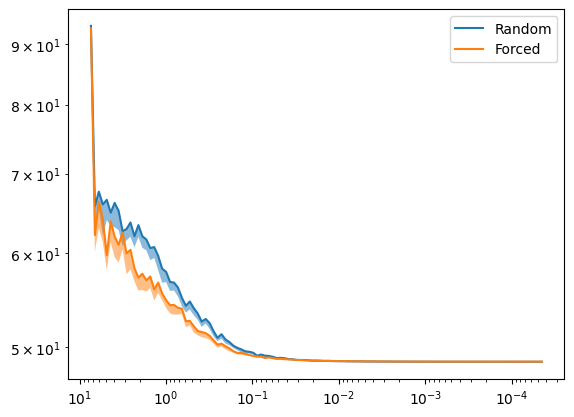

In [44]:
names = ['Random', 'Forced']
for i, energies in enumerate(res):
    energies = np.array(energies)
    
    E_mean = np.mean(energies, axis=0)
    E_conf = (np.std(energies, axis=0) * 1.96 / np.sqrt(n_simulations))
    
    
    Ts = get_T_history(Temp_max, Temp_min, alpha)
    
    
    plt.loglog(Ts, E_mean, label=names[i])
    plt.fill_between(Ts, E_mean, E_mean-E_conf, E_mean+E_conf, alpha=0.5)
plt.gca().invert_xaxis()
plt.legend()

# Random vs Forced

In [45]:
Ns = [11, 20]
alpha = 0.9
R = 1
Temp_max = np.exp(2)
Temp_min = np.exp(-10)
iter_num = 100
methods = [simulated_annealing, simulated_annealing_forces]

results = []
for N in Ns:
    temp = []
    for method in methods:
        energies = []
        for sim in range(n_simulations):
            p, E = method(N, R, Temp_max, Temp_min, alpha, iter_num)
            energies.append(E)
    
        temp.append(energies)
    results.append(temp)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


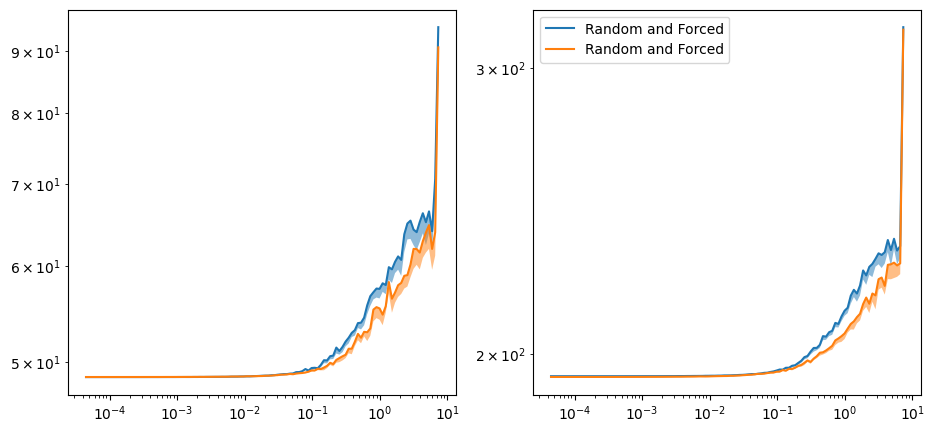

In [53]:
names = ['Random', 'Random and Forced']
fig, ax = plt.subplots(1,2, figsize=(11,5))
for i, res in enumerate(results):
    for j, energies in enumerate(res):
        # To array
        energies = np.array(energies)
        
        # Get mean and confidence interval
        E_mean = np.mean(energies, axis=0)
        E_conf = (np.std(energies, axis=0) * 1.96 / np.sqrt(n_simulations))
    
    
        Ts = get_T_history(Temp_max, Temp_min, alpha)
    
    
        ax[i].loglog(Ts, E_mean, label=names[i])
        ax[i].fill_between(Ts, E_mean, E_mean-E_conf, E_mean+E_conf, alpha=0.5)
    plt.gca().invert_xaxis()
    plt.legend()

# Vary iterations

In [84]:
Parameters
N = [5, 7, 9, 11]
iters = [1, 2, 5, 10, 25, 50, 100]
R = 1
Temp_max = np.exp(2)
Temp_min = np.exp(-10)
alpha = 0.9

# Storing results
results = []

for n in N:
    res = []    
    for iter_num in iters:
        # Store energies
        energies = []
        
        # Loop through each simulation
        for sim in range(n_simulations):
            # Run simulation
            p, E = simulated_annealing_forces(n, R, Temp_max, Temp_min, alpha, iter_num)
            
            # Add to list
            energies.append(E)
        
        # Calculate mean and std
        E_mean = np.mean(energies)
        E_std = np.std(energies, ddof=1)
        
        # Calculate confidence interval
        E_conf = 1.96 * E_std / np.sqrt(n_simulations)
        
        res.append([E_mean, E_conf])
    
    # Add to results
    results = np.hstack([results, np.array(res)])

# Save results
np.savetxt('res/vary_iterations.txt', results)
            

In [ ]:
N = 25
alphas = [0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9]
R = 1
Temp_max = np.exp(2)
Temp_min = np.exp(-10)
iter_num = 100

# Storing results
results = np.array(alphas).reshape(-1, 1)

for alpha in alphas:
    # Store energies
    energies = []

    # Loop through each simulation
    for sim in range(n_simulations):
        # Run simulation
        p, E = simulated_annealing(n, R, Temp_max, Temp_min, alpha, iter_num)

        # Add to list
        energies.append(E)

    # Calculate mean and std
    E_mean = np.mean(energies)
    E_std = np.std(energies, ddof=1)

    # Calculate confidence interval
    E_conf = 1.96 * E_std / np.sqrt(n_simulations)

    results.append([E_mean, E_conf])

# Save results
np.savetxt('res/vary_alphas_25N.txt', results)

# Comparing with new method
## Different values for $\alpha$

In [3]:
N = [5, 7, 9, 11]
alphas = [0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9]
R = 1
Temp_max = np.exp(2)
Temp_min = np.exp(-10)
iter_num = 100

# Storing results
results = np.array(alphas).reshape(-1, 1)

for n in N:
    res = []
    for alpha in alphas:
        # Store energies
        energies = []

        # Loop through each simulation
        for sim in range(n_simulations):
            # Run simulation
            p, E = simulated_annealing_forces(n, R, Temp_max, Temp_min, alpha, iter_num)

            # Add to list
            energies.append(E)

        # Calculate mean and std
        E_mean = np.mean(energies)
        E_std = np.std(energies, ddof=1)

        # Calculate confidence interval
        E_conf = 1.96 * E_std / np.sqrt(n_simulations)

        res.append([E_mean, E_conf])

    # Add to results
    results = np.hstack([results, np.array(res)])

# Save results
np.savetxt('res/vary_alphas_forces.txt', results)

## Different Markov-Chain lengths

In [4]:
# Parameters
N = [5, 7, 9, 11]
iters = [1, 2, 5, 10, 25, 50, 100]
R = 1
Temp_max = np.exp(2)
Temp_min = np.exp(-10)
alpha = 0.9

# Storing results
results = np.array(iters).reshape(-1, 1)

for n in N:
    res = []
    for iter_num in iters:
        # Store energies
        energies = []

        # Loop through each simulation
        for sim in range(n_simulations):
            # Run simulation
            p, E = simulated_annealing_forces(n, R, Temp_max, Temp_min, alpha, iter_num)

            # Add to list
            energies.append(E[-1])

        # Calculate mean and std
        E_mean = np.mean(energies)
        E_std = np.std(energies, ddof=1)

        # Calculate confidence interval
        E_conf = 1.96 * E_std / np.sqrt(n_simulations)

        res.append([E_mean, E_conf])

    # Add to results
    results = np.hstack([results, np.array(res)])

# Save results
np.savetxt('res/vary_iterations_forces.txt', results)


# Finding magic numbers with only random perturbations

In [4]:
# Parameters
N_begin = 24
N_end = 49
Ns = np.arange(N_begin, N_end)
iter_num = 100
R = 1
Temp_max = np.exp(2)
Temp_min = np.exp(-10)
alpha = 0.9

# Positions
positions = multi_simulate_particle(Ns, 1, Temp_max, Temp_min, alpha, iter_num, simulated_annealing)

# Sort positions
lengths = [len(positions[i]) for i in range(len(positions))]
sorted_positions = [x for _, x in sorted(zip(lengths, positions))]

# To one array
positions = np.vstack(sorted_positions)

# Save results
np.savetxt('res/configurations_bigN.txt', positions)
    

In [15]:
# Range for magic numbers
Ns = np.arange(25, 30)

# Number of simulations
n_sims = 10

positions = []

for N in Ns:
    p, E = optimal_configuration(N, 1, Temp_max, Temp_min, alpha, iter_num, n_sims, simulated_annealing)
    positions.append(p)

positions = np.vstack(positions)

# Save results
np.savetxt('res/configurations_bigN2.txt', positions)

In [37]:
# Range for magic numbers
Ns = [29, 30]

# Number of simulations
n_sims = 50

positions = []

for N in Ns:
    p, E = optimal_configuration(N, 1, Temp_max, Temp_min, alpha, iter_num, n_sims, simulated_annealing)
    positions.append(p)

positions = np.vstack(positions)

# Save results
np.savetxt('res/configurations_bigN3.txt', positions)

# Finding magic number with random and forced perturbations

In [38]:
# Range for magic numbers
Ns = [29, 30]

# Number of simulations
n_sims = 50

positions = []

for N in Ns:
    p, E = optimal_configuration(N, 1, Temp_max, Temp_min, alpha, iter_num, n_sims, simulated_annealing_forces)
    positions.append(p)

positions = np.vstack(positions)

# Save results
np.savetxt('res/configurations_bigN3_forces.txt', positions)